## Experiments that have been excluded from the main pipeline

In [6]:
import librosa
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import helpers
import crepe

In [7]:
# Load and play audio file
audio_file_path = "audios/tj1.wav"
y, sr = librosa.load(audio_file_path, duration=30)
print("Input audio:")
display(ipd.Audio(y, rate=sr))

spectrogram = np.abs(librosa.stft(y))

Input audio:


## 1. Sound source separation with NMF

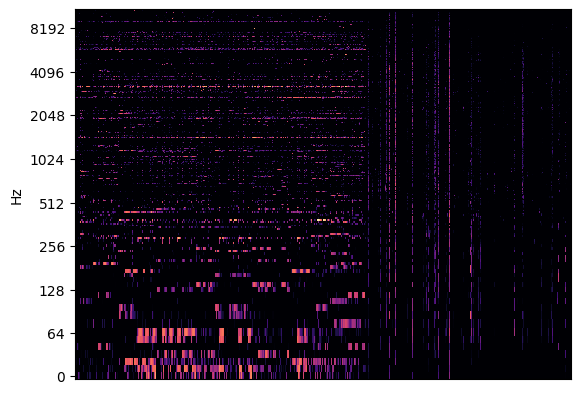

In [8]:
comps, acts = librosa.decompose.decompose(spectrogram)
librosa.display.specshow(librosa.amplitude_to_db(comps, ref=np.max), y_axis="log")
librosa.display.specshow(librosa.amplitude_to_db(acts, ref=np.max), y_axis="log")

## 2. F0 tracking using CREPE
The first approach included the usage of CREPE which operates on the waveform domain. For this reason, the harmonic and percussive spectrogram are reconstructed using griffin and lim algorithm.

In [9]:
harmonic, percussive = librosa.decompose.hpss(spectrogram, margin=16, kernel_size=31)

# Reconstruct harmonic component audio and display it
harmonic_audio = librosa.griffinlim(harmonic)
print("Harmonic component:")
display(ipd.Audio(harmonic_audio, rate=sr))

# Reconstruct harmonic component audio and display it
percussive_audio = librosa.griffinlim(percussive)
print("Percussive component:")
display(ipd.Audio(percussive_audio, rate=sr))

Harmonic component:


Percussive component:


44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step


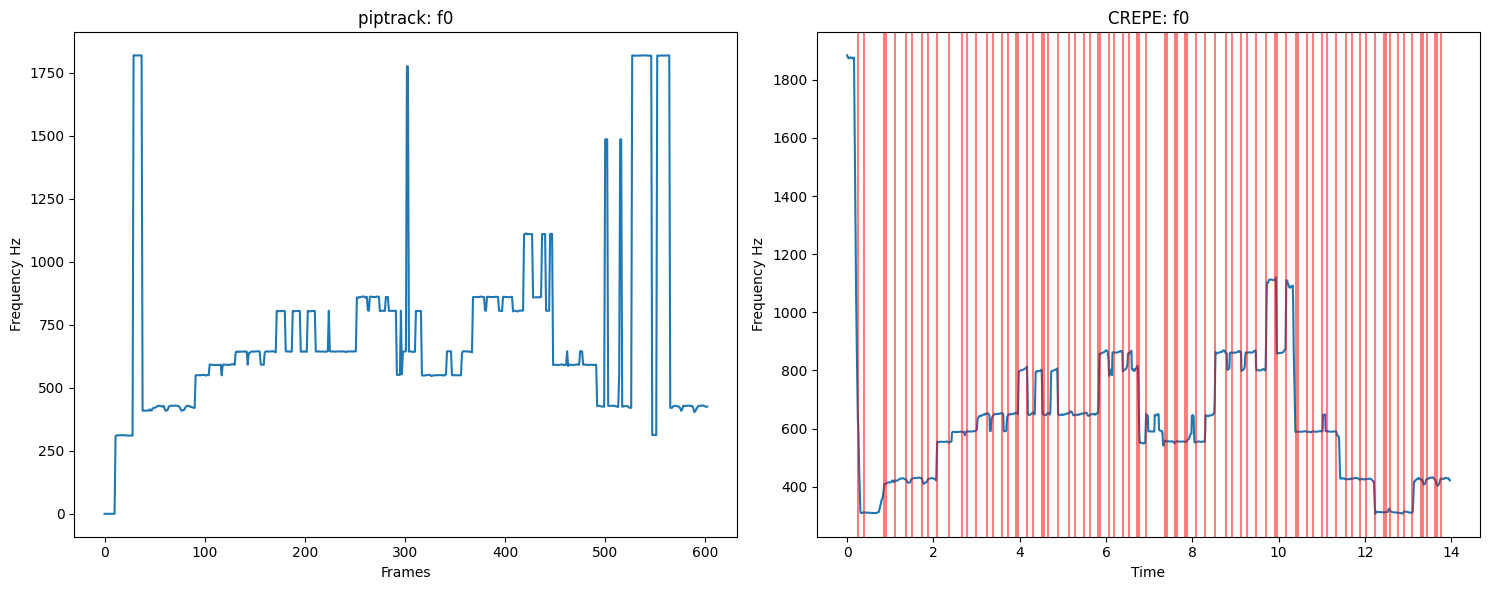

In [10]:
time, frequency, confidence, activation = crepe.predict(harmonic_audio, sr, viterbi=True)
onsets = librosa.onset.onset_detect(y=percussive_audio, units="time")
pitches_dsp = helpers.detect_pitch(S=harmonic, sr=sr, fmin=120, fmax=2000)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15, 6))

frames = np.arange(len(pitches_dsp))
# Plot piptrack
ax.plot(frames, pitches_dsp)
ax.set_xlabel("Frames")
ax.set_ylabel("Frequency Hz")
ax.set_title("piptrack: f0")

# Plot CREPE
ax2.plot(time, frequency)
ax2.set_xlabel("Time")
ax2.set_ylabel("Frequency Hz")
ax2.set_title("CREPE: f0")

# Plotting onsets on ax2
for onset in onsets:
    ax2.axvline(x=onset, color='r', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()